source: https://www.tensorflow.org/tutorials/quickstart/beginner?hl=en

In [27]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.8.0


In [28]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

Expected:  5


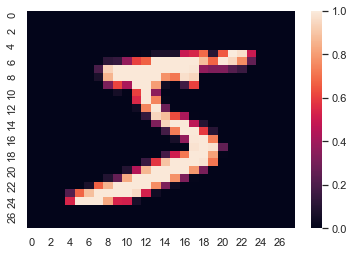

In [29]:
import seaborn as sns;
sns.set_theme();

ax = sns.heatmap(x_train[0]);
print("Expected: ", y_train[0])

In [30]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # Flatterns input
  tf.keras.layers.Dense(128, activation='relu'), # Fully connected layer
  tf.keras.layers.Dropout(0.2), # P=0.2 of ignoring a neuron during training
  tf.keras.layers.Dense(10)
])

Note: It is possible to bake the tf.nn.softmax function into the activation function for the last layer of the network. While this can make the model output more directly interpretable, this approach is discouraged as it's impossible to provide an exact and numerically stable loss calculation for all models when using a softmax output.

In [31]:
predictions = model(x_train[:1]).numpy() # logit output
tf.nn.softmax(predictions).numpy() # exp(predictions)/sum(exp(predictions))

array([[0.11975615, 0.12686665, 0.11856159, 0.05804828, 0.07647942,
        0.06190214, 0.19344102, 0.12238002, 0.07500967, 0.04755506]],
      dtype=float32)

In [32]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
loss_fn(y_train[:1], predictions).numpy()

2.7822006

In [33]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

In [34]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2924 - accuracy: 0.9128
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1385 - accuracy: 0.9588
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1055 - accuracy: 0.9679
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0857 - accuracy: 0.9737
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0741 - accuracy: 0.9769


In [35]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 1s - loss: 0.0774 - accuracy: 0.9753 - 603ms/epoch - 2ms/step


[0.07736649364233017, 0.9753000140190125]

In [36]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

In [37]:
probability_model(x_test[:5])

<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[5.9490464e-08, 4.8044133e-09, 1.1503145e-05, 6.6876854e-04,
        1.0395862e-09, 3.2674322e-07, 1.4400590e-12, 9.9925393e-01,
        5.6124332e-08, 6.5307693e-05],
       [5.1050977e-09, 8.1386877e-04, 9.9918300e-01, 2.3928757e-07,
        1.4138551e-15, 2.4306173e-06, 1.5241581e-09, 9.3781045e-11,
        4.2516893e-07, 1.8681693e-11],
       [4.1100904e-07, 9.9912328e-01, 1.4588214e-05, 1.6314936e-05,
        6.1515930e-05, 5.3486883e-06, 3.0844380e-06, 6.8975764e-04,
        7.7063982e-05, 8.8479037e-06],
       [9.9865997e-01, 3.3545342e-09, 1.7187090e-04, 1.5479751e-06,
        5.0329563e-06, 1.0823568e-05, 8.8384183e-04, 3.4227236e-05,
        4.5755914e-07, 2.3211987e-04],
       [8.5072215e-06, 3.4880884e-08, 2.4457226e-05, 7.3975519e-07,
        9.8894811e-01, 1.1674945e-08, 7.3253830e-07, 1.5471305e-04,
        6.2754077e-07, 1.0862008e-02]], dtype=float32)>